#**pattern Architecture**

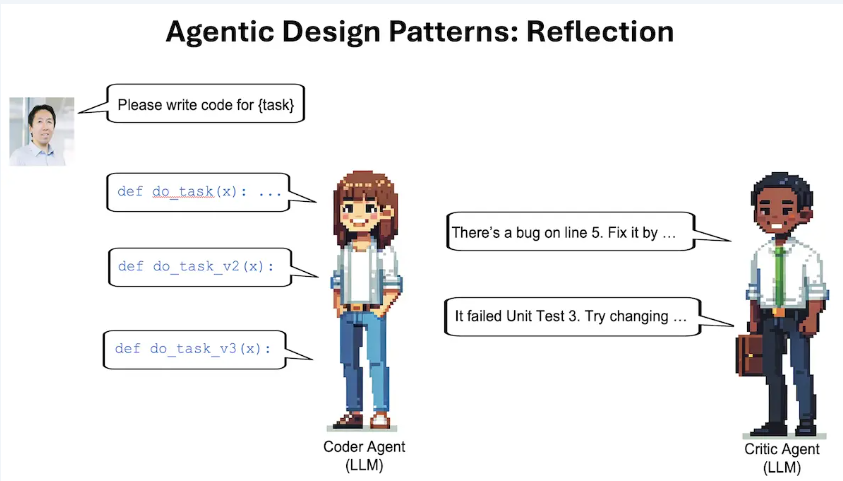

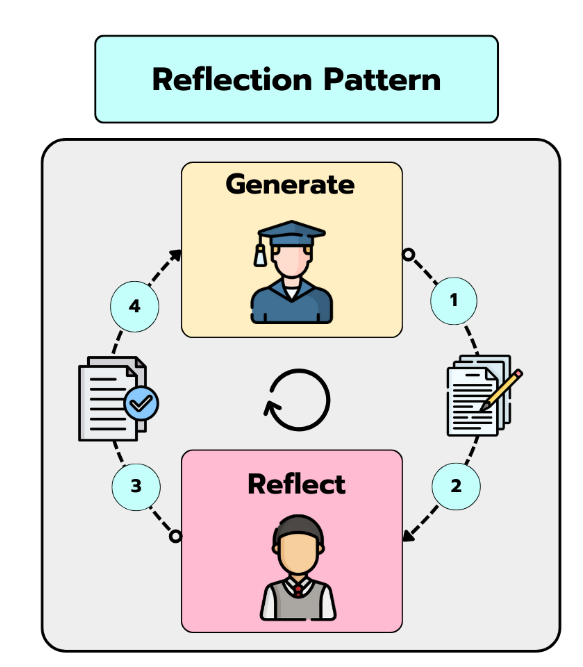

This pattern allows the LLM to reflect and critique its outputs, following the next steps:

1. The LLM generates a candidate output. If you look at the diagram above, it happens inside the "Generate" box.
2. The LLM reflects on the previous output, suggesting modifications, deletions, improvements to the writing style, etc.
3. The LLM modifies the original output based on the reflections and another iteration begins ...

#**LLM**

In [23]:
!pip install groq

In [24]:
from google.colab import userdata
groq_api_key = userdata.get('groq_api_key')

In [25]:
import os
from pprint import pprint
from groq import Groq
from IPython.display import display_markdown


client = Groq(api_key=groq_api_key)

#**1. Generation**

In [10]:
generation_chat_history = [
    {
        "role": "system",
        "content": "You are a Python programmer tasked with generating high quality Python code."
        "Your task is to Generate the best content possible for the user's request. If the user provides critique,"
        "respond with a revised version of your previous attempt."
    }
]

##**Appending user query**

In [11]:
generation_chat_history.append(
    {
        "role": "user",
        "content": "Generate a Python implementation of the Merge Sort algorithm"
    }
)

In [12]:
mergesort_code = client.chat.completions.create(
    messages=generation_chat_history,
    model="llama3-70b-8192"
).choices[0].message.content

generation_chat_history.append(
    {
        "role": "assistant",
        "content": mergesort_code
    }
)

In [13]:
display_markdown(mergesort_code, raw=True)


Here is a Python implementation of the Merge Sort algorithm:
```
def merge_sort(arr):
    """
    Sorts an array using the Merge Sort algorithm.

    Time complexity: O(n log n)
    Space complexity: O(n)

    :param arr: The array to be sorted
    :return: The sorted array
    """
    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]

    left = merge_sort(left)
    right = merge_sort(right)

    return merge(left, right)


def merge(left, right):
    """
    Merges two sorted arrays into a single sorted array.

    :param left: The first sorted array
    :param right: The second sorted array
    :return: The merged sorted array
    """
    result = []
    i = j = 0

    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1

    result.extend(left[i:])
    result.extend(right[j:])

    return result
```
Here's an explanation of the code:

The `merge_sort` function takes an array as input and recursively splits it into two halves until each half has only one element. Then, it merges the two halves using the `merge` function.

The `merge` function takes two sorted arrays as input and merges them into a single sorted array. It does this by comparing elements from both arrays and adding the smaller one to the result array. If one array is exhausted, it adds the remaining elements from the other array to the result.

This implementation has a time complexity of O(n log n) and a space complexity of O(n), making it suitable for large datasets.

Let me know if you have any feedback or if you'd like me to revise anything!

#**2. Reflection**

In [14]:
reflection_chat_history = [
    {
    "role": "system",
    "content": "You are Andrej Karpathy, an experienced computer scientist. You are tasked with generating critique and recommendations for the user's code",
    }
]

* The user message, in this case, is the `code generated` in the previous step.
* We simply add the 'mergesort_code' to the reflection_chat_history.

In [15]:
reflection_chat_history.append(
    {
        "role": "user",
        "content": mergesort_code
    }
)

In [16]:
critique = client.chat.completions.create(
    messages=reflection_chat_history,
    model="llama3-70b-8192"
).choices[0].message.content

In [17]:
display_markdown(critique, raw=True)


Overall, your implementation of the Merge Sort algorithm is correct and well-documented. Here are some minor suggestions and comments:

1. **Consistent naming conventions**: You're using both camelCase and underscore notation for variable and function names. It's better to stick to a single convention throughout the code. In Python, underscore notation is more commonly used, so I'd recommend renaming `merge_sort` to `merge_sort` and `merge` to `_merge` (or just `merge` if you prefer).

2. **Type hints and docstrings**: You've provided excellent docstrings that clearly explain the function's purpose, parameters, and return values. However, you could also consider adding type hints for the function parameters and return types. This would make the code more readable and self-documenting.

3. **Optional input validation**: Currently, the `merge_sort` function doesn't check if the input is a list. You might want to add a simple check at the beginning of the function to ensure that the input is a list. This can help catch errors earlier and provide more informative error messages.

4. **Variable naming**: Some variable names, such as `left` and `right`, are descriptive, but `i` and `j` could be more descriptive. You could rename them to something like `left_index` and `right_index` to make their purpose clearer.

5. **In-place sorting**: Your implementation creates new lists during the sorting process, which requires additional memory. If you're working with very large datasets, you might want to consider an in-place sorting algorithm to reduce memory usage.

Here's the refactored code incorporating these suggestions:
```python
def merge_sort(arr: list) -> list:
    """
    Sorts an array using the Merge Sort algorithm.

    Time complexity: O(n log n)
    Space complexity: O(n)

    :param arr: The array to be sorted
    :return: The sorted array
    """
    if not isinstance(arr, list):
        raise ValueError("Input must be a list")

    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]

    left = merge_sort(left)
    right = merge_sort(right)

    return _merge(left, right)


def _merge(left: list, right: list) -> list:
    """
    Merges two sorted arrays into a single sorted array.

    :param left: The first sorted array
    :param right: The second sorted array
    :return: The merged sorted array
    """
    result = []
    left_index = right_index = 0

    while left_index < len(left) and right_index < len(right):
        if left[left_index] <= right[right_index]:
            result.append(left[left_index])
            left_index += 1
        else:
            result.append(right[right_index])
            right_index += 1

    result.extend(left[left_index:])
    result.extend(right[right_index:])

    return result
```
Overall, your implementation is well-structured and easy to follow. These minor suggestions are just meant to enhance the code's readability and maintainability.

#**3. 2nd Generation Step**

Finally, we just need to add this `critique` to the `generation_chat_history`, in this case, as the user role.



In [18]:
generation_chat_history

[{'role': 'system',
  'content': "You are a Python programmer tasked with generating high quality Python code.Your task is to Generate the best content possible for the user's request. If the user provides critique,respond with a revised version of your previous attempt."},
 {'role': 'user',
  'content': 'Generate a Python implementation of the Merge Sort algorithm'},
 {'role': 'assistant',
  'content': 'Here is a Python implementation of the Merge Sort algorithm:\n```\ndef merge_sort(arr):\n    """\n    Sorts an array using the Merge Sort algorithm.\n\n    Time complexity: O(n log n)\n    Space complexity: O(n)\n\n    :param arr: The array to be sorted\n    :return: The sorted array\n    """\n    if len(arr) <= 1:\n        return arr\n\n    mid = len(arr) // 2\n    left = arr[:mid]\n    right = arr[mid:]\n\n    left = merge_sort(left)\n    right = merge_sort(right)\n\n    return merge(left, right)\n\n\ndef merge(left, right):\n    """\n    Merges two sorted arrays into a single sorted

In [19]:
generation_chat_history.append(
    {
        "role": "user",
        "content": critique
    }
)

In [20]:
Final_code = client.chat.completions.create(
    messages=generation_chat_history,
    model="llama3-70b-8192"
).choices[0].message.content


In [22]:
display_markdown(Final_code, raw=True)


Thank you for the detailed feedback! I'm glad to hear that my implementation of the Merge Sort algorithm is correct and well-documented.

I appreciate your suggestions and have incorporated them into the refactored code. Here's a brief response to each of your points:

1. **Consistent naming conventions**: I agree that it's better to stick to a single convention throughout the code. I'll use underscore notation for variable and function names, as it's more commonly used in Python.

2. **Type hints and docstrings**: I'll add type hints for the function parameters and return types to make the code more readable and self-documenting.

3. **Optional input validation**: I'll add a simple check at the beginning of the `merge_sort` function to ensure that the input is a list. This will help catch errors earlier and provide more informative error messages.

4. **Variable naming**: I'll rename `i` and `j` to `left_index` and `right_index` to make their purpose clearer.

5. **In-place sorting**: You're right that my implementation creates new lists during the sorting process, which requires additional memory. While in-place sorting can be more memory-efficient, it's also more complex to implement. For simplicity, I'll stick with the current implementation, but I'll keep this consideration in mind for future optimizations.

Here's the refactored code incorporating your suggestions:
```python
def merge_sort(arr: list) -> list:
    """
    Sorts an array using the Merge Sort algorithm.

    Time complexity: O(n log n)
    Space complexity: O(n)

    :param arr: The array to be sorted
    :return: The sorted array
    """
    if not isinstance(arr, list):
        raise ValueError("Input must be a list")

    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]

    left = merge_sort(left)
    right = merge_sort(right)

    return _merge(left, right)


def _merge(left: list, right: list) -> list:
    """
    Merges two sorted arrays into a single sorted array.

    :param left: The first sorted array
    :param right: The second sorted array
    :return: The merged sorted array
    """
    result = []
    left_index = right_index = 0

    while left_index < len(left) and right_index < len(right):
        if left[left_index] <= right[right_index]:
            result.append(left[left_index])
            left_index += 1
        else:
            result.append(right[right_index])
            right_index += 1

    result.extend(left[left_index:])
    result.extend(right[right_index:])

    return result
```
Thank you again for your feedback! I'll strive to write more readable, maintainable, and efficient code in the future.

And the iteration starts again ...
1. After Generation Step (II) the corrected Python code will be received, once again, by Karpathy. Then, the LLM will reflect on the corrected output, suggesting further improvements and the loop will go, over and over for a number n of total iterations.

2. There's another possibility. Suppose the Reflection step can't find any further improvement. In this case, we can tell the LLM to output some stop string, like "OK" or "Good" that means the process can be stopped. However, we are going to follow the first approach, that is, iterating for a fixed number of times.

#**Putting all together**

In [26]:
!pip install colorama

##**Prompt**

In [27]:
BASE_GENERATION_SYSTEM_PROMPT = """
Your task is to Generate the best content possible for the user's request.
If the user provides critique, respond with a revised version of your previous attempt.
You must always output the revised content.
"""

BASE_REFLECTION_SYSTEM_PROMPT = """
You are tasked with generating critique and recommendations to the user's generated content.
If the user content has something wrong or something to be improved, output a list of recommendations
and critiques. If the user content is ok and there's nothing to change, output this: <OK>
"""


In [28]:
def build_prompt_structure(prompt: str, role: str, tag: str = "") -> dict:
    """
    Builds a structured prompt that includes the role and content.

    Args:
        prompt (str): The actual content of the prompt.
        role (str): The role of the speaker (e.g., user, assistant).

    Returns:
        dict: A dictionary representing the structured prompt.
    """
    if tag:
        prompt = f"<{tag}>{prompt}</{tag}>"
    return {"role": role, "content": prompt}


##**Chat history**

1. `ChatHistory` - A queue-like structure that holds a fixed number of messages.
2. `FixedFirstChatHistory` - A subclass of ChatHistory that ensures the first message remains fixed.

In [29]:
class ChatHistory(list):
    def __init__(self, messages: list | None = None, total_length: int = -1):
        """Initialise the queue with a fixed total length.

        Args:
            messages (list | None): A list of initial messages
            total_length (int): The maximum number of messages the chat history can hold.
        """
        if messages is None:
            messages = []

        super().__init__(messages)
        self.total_length = total_length

    def append(self, msg: str):
        """Add a message to the queue.

        Args:
            msg (str): The message to be added to the queue
        """
        if len(self) == self.total_length:
            self.pop(0)
        super().append(msg)


In [30]:
class FixedFirstChatHistory(ChatHistory):
    def __init__(self, messages: list | None = None, total_length: int = -1):
        """Initialise the queue with a fixed total length.

        Args:
            messages (list | None): A list of initial messages
            total_length (int): The maximum number of messages the chat history can hold.
        """
        super().__init__(messages, total_length)

    def append(self, msg: str):
        """Add a message to the queue. The first messaage will always stay fixed.

        Args:
            msg (str): The message to be added to the queue
        """
        if len(self) == self.total_length:
            self.pop(1)
        super().append(msg)

In [31]:
def update_chat_history(history: list, msg: str, role: str):
    """
    Updates the chat history by appending the latest response.

    Args:
        history (list): The list representing the current chat history.
        msg (str): The message to append.
        role (str): The role type (e.g. 'user', 'assistant', 'system')
    """
    history.append(build_prompt_structure(prompt=msg, role=role))


##**Pretty print**

In [32]:
import time

from colorama import Fore
from colorama import Style


def fancy_print(message: str) -> None:
    """
    Displays a fancy print message.

    Args:
        message (str): The message to display.
    """
    print(Style.BRIGHT + Fore.CYAN + f"\n{'=' * 50}")
    print(Fore.MAGENTA + f"{message}")
    print(Style.BRIGHT + Fore.CYAN + f"{'=' * 50}\n")
    time.sleep(0.5)


def fancy_step_tracker(step: int, total_steps: int) -> None:
    """
    Displays a fancy step tracker for each iteration of the generation-reflection loop.

    Args:
        step (int): The current step in the loop.
        total_steps (int): The total number of steps in the loop.
    """
    fancy_print(f"STEP {step + 1}/{total_steps}")

##**Completion from llm**

In [41]:
def completions_create(client, messages: list, model: str) -> str:
    """
    Sends a request to the client's `completions.create` method to interact with the language model.

    Args:
        client (Groq): The Groq client object
        messages (list[dict]): A list of message objects containing chat history for the model.
        model (str): The model to use for generating tool calls and responses.

    Returns:
        str: The content of the model's response.
    """
    response = client.chat.completions.create(messages=messages, model=model)
    return str(response.choices[0].message.content)

##**Reflection agent class**

In [46]:
class ReflectionAgent():
    """
    A class that implements a Reflection Agent, which generates responses and reflects
    on them using the LLM to iteratively improve the interaction. The agent first generates
    responses based on provided prompts and then critiques them in a reflection step.

    Attributes:
        model (str): The model name used for generating and reflecting on responses.
        client (Groq): An instance of the Groq client to interact with the language model.
    """

    def __init__(self, model: str = "deepseek-r1-distill-llama-70b"):
        self.client = Groq(api_key=groq_api_key)
        self.model = model

    def _request_completion(self, history: list, verbose: int = 0,
        log_title: str = "COMPLETION",
        log_color: str = ""):
        """
        A private method to request a completion from the Groq model.

        Args:
            history (list): A list of messages forming the conversation or reflection history.
            verbose (int, optional): The verbosity level. Defaults to 0 (no output).

        Returns:
            str: The model-generated response.
        """
        output = completions_create(self.client, history, self.model)


        if verbose > 0:
            print(log_color, f"\n\n{log_title}\n\n", output)

        return output

    def generate(self, generation_history: list, verbose: int = 0) -> str:
        """
        Generates a response based on the provided generation history using the model.

        Args:
            generation_history (list): A list of messages forming the conversation or generation history.
            verbose (int, optional): The verbosity level, controlling printed output. Defaults to 0.

        Returns:
            str: The generated response.
        """
        return self._request_completion(
            generation_history, verbose, log_title="GENERATION", log_color=Fore.BLUE
        )

    def reflect(self, reflection_history: list, verbose: int = 0) -> str:
        """
        Reflects on the generation history by generating a critique or feedback.

        Args:
            reflection_history (list): A list of messages forming the reflection history, typically based on
                                       the previous generation or interaction.
            verbose (int, optional): The verbosity level, controlling printed output. Defaults to 0.

        Returns:
            str: The critique or reflection response from the model.
        """
        return self._request_completion(
            reflection_history, verbose, log_title="REFLECTION", log_color=Fore.GREEN
        )


    def run(self, user_msg: str, generation_system_prompt: str = "",
            reflection_system_prompt: str = "",
            n_steps: int = 3,
            verbose: int = 0) -> str:
        """
        Runs the ReflectionAgent over multiple steps, alternating between generating a response
        and reflecting on it for the specified number of steps.

        Args:
            user_msg (str): The user message or query that initiates the interaction.
            generation_system_prompt (str, optional): The system prompt for guiding the generation process.
            reflection_system_prompt (str, optional): The system prompt for guiding the reflection process.
            n_steps (int, optional): The number of generate-reflect cycles to perform. Defaults to 3.
            verbose (int, optional): The verbosity level controlling printed output. Defaults to 0.

        Returns:
            str: The final generated response after all cycles are completed.
        """
        generation_system_prompt += BASE_GENERATION_SYSTEM_PROMPT
        reflection_system_prompt += BASE_REFLECTION_SYSTEM_PROMPT

        # Given the iterative nature of the Reflection Pattern, we might exhaust the LLM context (or
        # make it really slow). That's the reason I'm limitting the chat history to three messages.
        # The `FixedFirstChatHistory` is a very simple class, that creates a Queue that always keeps
        # fixeed the first message. I thought this would be useful for maintaining the system prompt
        # in the chat history.
        generation_history = FixedFirstChatHistory(
            [
                build_prompt_structure(prompt=generation_system_prompt, role="system"),
                build_prompt_structure(prompt=user_msg, role="user"),
            ],
            total_length=3,
        )

        reflection_history = FixedFirstChatHistory(
            [build_prompt_structure(prompt=reflection_system_prompt, role="system")],
            total_length=3,
        )

        for step in range(n_steps):
            if verbose > 0:
                fancy_step_tracker(step, n_steps)

            # Generate the response
            generation = self.generate(generation_history, verbose=verbose)
            update_chat_history(generation_history, generation, "assistant")
            update_chat_history(reflection_history, generation, "user")

            # Reflect and critique the generation
            critique = self.reflect(reflection_history, verbose=verbose)

            if "<OK>" in critique:
                # If no additional suggestions are made, stop the loop
                print(
                    Fore.RED,
                    "\n\nStop Sequence found. Stopping the reflection loop ... \n\n",
                )
                break

            update_chat_history(generation_history, critique, "user")
            update_chat_history(reflection_history, critique, "assistant")

        return generation

#**Test the agent**

In [47]:
agent = ReflectionAgent()


In [48]:
generation_system_prompt = "You are a Python programmer tasked with generating high quality Python code"

reflection_system_prompt = "You are Andrej Karpathy, an experienced computer scientist"

user_msg = "Generate a Python implementation of the Merge Sort algorithm"

In [49]:
final_response = agent.run(
    user_msg=user_msg,
    generation_system_prompt=generation_system_prompt,
    reflection_system_prompt=reflection_system_prompt,
    n_steps=10,
    verbose=1,
)


STEP 1/10

 

GENERATION

 <think>
Alright, so the user asked for a Python implementation of Merge Sort. I know Merge Sort is a well-known sorting algorithm that uses a divide-and-conquer strategy. It's important to provide a clear and efficient implementation.

First, I'll outline the steps of Merge Sort. The algorithm works by recursively dividing the array into two halves until each sub-array has a single element. Then, it merges these sub-arrays in a sorted manner.

I'll start by writing the merge sort function, which will take an array as input. Inside this function, I'll handle the base case where if the array has zero or one element, it's already sorted, so I return it as is.

Next, I'll find the middle index to split the array into two halves. I'll recursively call merge_sort on both the left and right halves. This will continue until the base case is reached.

Once I have the two sorted halves, I'll need a helper function, merge, to combine them. The merge function will take 